## Import Libraries

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action = 'ignore', category= FutureWarning)

## Load the Dataset

In [124]:
df=pd.read_csv('Autism_Data.arff')
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO


In [125]:
df.replace("?",np.nan,inplace=True)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
A1_Score           704 non-null int64
A2_Score           704 non-null int64
A3_Score           704 non-null int64
A4_Score           704 non-null int64
A5_Score           704 non-null int64
A6_Score           704 non-null int64
A7_Score           704 non-null int64
A8_Score           704 non-null int64
A9_Score           704 non-null int64
A10_Score          704 non-null int64
age                702 non-null object
gender             704 non-null object
ethnicity          609 non-null object
jundice            704 non-null object
austim             704 non-null object
contry_of_res      704 non-null object
used_app_before    704 non-null object
result             704 non-null int64
age_desc           704 non-null object
relation           609 non-null object
Class/ASD          704 non-null object
dtypes: int64(11), object(10)
memory usage: 115.6+ KB


In [127]:
df.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

## Data Cleaning

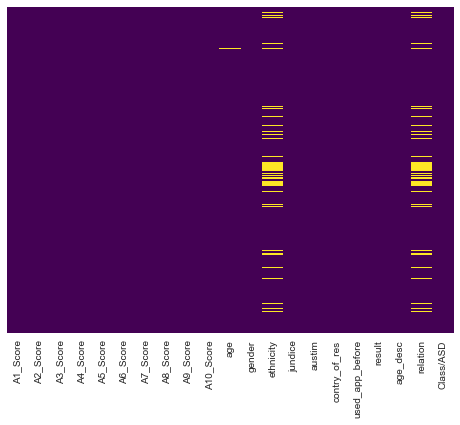

In [128]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [129]:
df=df.drop(['ethnicity', 'austim','jundice', 'contry_of_res', 'age_desc', 'used_app_before','relation'], axis=1)

In [130]:
df.dropna(inplace=True)

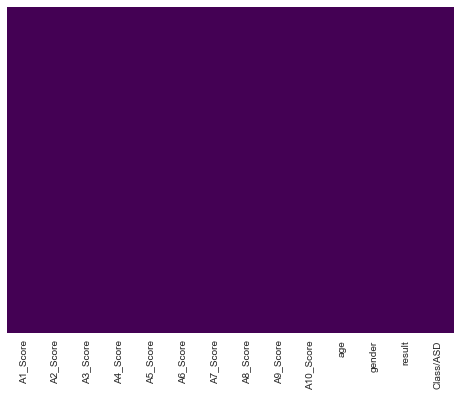

In [131]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Exploratory Data Analysis

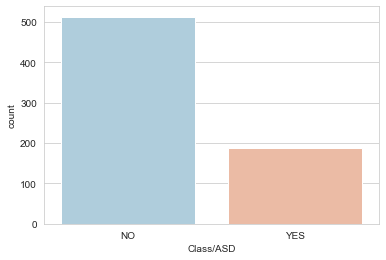

In [132]:
sns.set_style('whitegrid')
sns.countplot(x='Class/ASD',data=df,palette='RdBu_r')

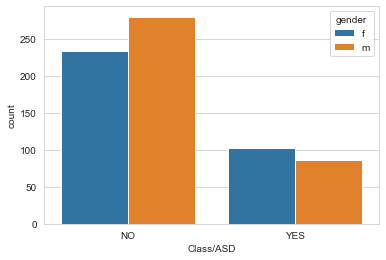

In [133]:
sns.set_style('whitegrid')
sns.countplot(x='Class/ASD',hue='gender',data=df)

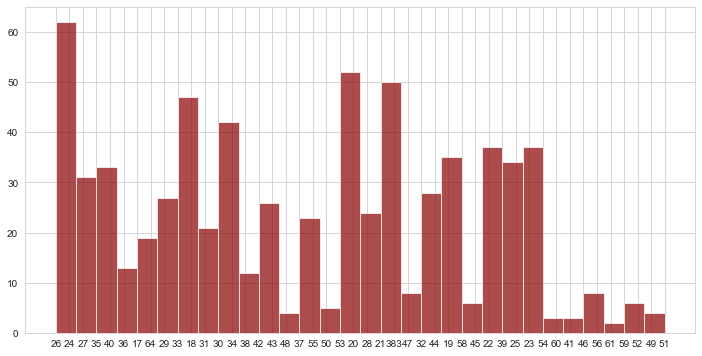

In [134]:
plt.figure(figsize=(12,6))
df['age'].hist(bins=30,color='darkred',alpha=0.7)

## Converting Categorical Features

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 0 to 703
Data columns (total 14 columns):
A1_Score     702 non-null int64
A2_Score     702 non-null int64
A3_Score     702 non-null int64
A4_Score     702 non-null int64
A5_Score     702 non-null int64
A6_Score     702 non-null int64
A7_Score     702 non-null int64
A8_Score     702 non-null int64
A9_Score     702 non-null int64
A10_Score    702 non-null int64
age          702 non-null object
gender       702 non-null object
result       702 non-null int64
Class/ASD    702 non-null object
dtypes: int64(11), object(3)
memory usage: 102.3+ KB


In [136]:
gender = pd.get_dummies(df['gender'],drop_first=True, prefix='gender')
Class_ASD = pd.get_dummies(df['Class/ASD'],drop_first=True, prefix='ASD')

In [137]:
df.drop(['gender','Class/ASD'],axis=1,inplace=True)

In [138]:
df = pd.concat([df, gender, Class_ASD],axis=1)

In [139]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,gender_m,ASD_YES
0,1,1,1,1,0,0,1,1,0,0,26,6,0,0
1,1,1,0,1,0,0,0,1,0,1,24,5,1,0
2,1,1,0,1,1,0,1,1,1,1,27,8,1,1
3,1,1,0,1,0,0,1,1,0,1,35,6,0,0
4,1,0,0,0,0,0,0,1,0,0,40,2,0,0


## Train Test Split

In [140]:
from sklearn.model_selection import train_test_split
X=df.drop('ASD_YES', axis=1)
y=df['ASD_YES']

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Base Learners

In [142]:
# SUPPORT VECTOR MACHINE
from sklearn.svm import SVC
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
clfs = []
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
np.random.seed(1)

param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid_svm = GridSearchCV(SVC(probability=True), param_grid, cv = kfolds, refit=True, verbose=1)
grid_svm.fit(X_train,y_train)

grid_svm.fit(X_train, y_train)
grid_svm.score(X_test, y_test)

clfs.append(grid_svm)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    4.2s finished


In [143]:
# MULTINOMIAL NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)
clfs.append(nb)

In [144]:
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.score(X_test, y_test)
clfs.append(dtree)

In [145]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
log_r=LogisticRegression()
log_r.fit(X_train, y_train)
log_r.score(X_test, y_test)
clfs.append(log_r)

In [146]:
#test the models with test data and print their accuracy scores
print('svm: {}'.format(grid_svm.score(X_test, y_test)))
print('nb: {}'.format(nb.score(X_test, y_test)))
print('dt: {}'.format(dtree.score(X_test, y_test)))
print('lr: {}'.format(log_r.score(X_test, y_test)))

svm: 0.995260663507109
nb: 0.8909952606635071
dt: 1.0
lr: 0.976303317535545


## Majority Voting Classifier  

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    3.8s finished


majority_voting_accuracy:  0.990521327014218


[[146   0]
 [  2  63]]


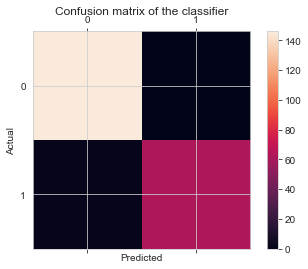



              precision    recall  f1-score   support

           0       0.99      1.00      0.99       146
           1       1.00      0.97      0.98        65

    accuracy                           0.99       211
   macro avg       0.99      0.98      0.99       211
weighted avg       0.99      0.99      0.99       211



In [147]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.externals import joblib
#create a dictionary of our models
estimators=[('svm', grid_svm), ('nb', nb), ('dt', dtree), ('lr', log_r)]
#create our voting classifier, inputting our models
majority_voting = VotingClassifier(estimators, voting='hard')

#fit model to training data
majority_voting.fit(X_train, y_train)
#test our model on the test data
majority_voting.score(X_test, y_test)

# save best model to current working directory
joblib.dump(majority_voting, "twitter_sentiment.pkl")

# load from file and predict using the best configs found in the CV step
model_max_v = joblib.load("twitter_sentiment.pkl" )

# get predictions from best model above
y_preds = model_max_v.predict(X_test)
print('majority_voting_accuracy: ',majority_voting.score(X_test, y_test))
print('\n')

import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds, labels)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('\n')
print(classification_report(y_test, y_preds))


## Weighted average classifier

ensamble score: 9.992007221626413e-16
Best Weights: [2.22044605e-16 9.28077060e-17 1.00000000e+00 1.38777878e-17]
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    3.8s finished


The accuracy weighted average classifier is : 1.0
weighted_average_accuracy:  1.0


[[146   0]
 [  0  65]]


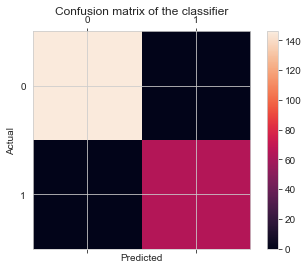



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00        65

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



In [148]:
# finding the optimum weights
from scipy.optimize import minimize
predictions = []
for clff in clfs:
    predictions.append(clff.predict(X_test))

def log_loss_func(weights):
    final_prediction = 0
    for weight, prediction in zip(weights, predictions):
            final_prediction += weight*prediction

    return log_loss(y_test, final_prediction)
    
#the algorithms need a starting value, right not we chose 0.5 for all weights
#its better to choose many random starting points and run minimize a few times
starting_values = [0.5]*len(predictions)

#adding constraints  and a different solver as suggested by user 16universe
cons = ({'type':'eq','fun':lambda w: 1-sum(w)})
#our weights are bound between 0 and 1
bounds = [(0,1)]*len(predictions)

res = minimize(log_loss_func, starting_values, method='SLSQP', bounds=bounds, constraints=cons)

print('ensamble score: {best_score}'.format(best_score=res['fun']))
print('Best Weights: {weights}'.format(weights=res['x']))

weighted_avg = VotingClassifier(estimators, voting='soft',weights=res['x']).fit(X_train, y_train)
print('The accuracy weighted average classifier is :', weighted_avg.score(X_test,y_test))

# save best model to current working directory
joblib.dump(weighted_avg, "twitter_sentiment.pkl")

# load from file and predict using the best configs found in the CV step
model_w_avg = joblib.load("twitter_sentiment.pkl" )

# get predictions from best model above
y_preds = model_w_avg.predict(X_test)
print('weighted_average_accuracy: ',weighted_avg.score(X_test, y_test))
print('\n')

import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds, labels)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('\n')
print(classification_report(y_test, y_preds))